## 数学推导

根据定义

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n}X_i
$$

期望为
$$
\mathbb{E}[\bar{X}] = \mathbb{E}\left[ \frac{1}{n} \sum_{i=1}^n X_i \right] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[X_i] = \frac{1}{n} \cdot n\mu = \mu
$$

方差为
$$
\mathrm{Var}(\bar{X}) = \mathrm{Var}\left( \frac{1}{n} \sum_{i=1}^n X_i \right) = \frac{1}{n^2} \sum_{i=1}^n \mathrm{Var}(X_i) = \frac{1}{n^2} \cdot n\sigma^2 = \frac{\sigma^2}{n}
$$

因此标准差为
$$
\mathrm{SD}(\bar{X}) = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}}
$$

类似的，根据定义

$$
S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

利用简单的代数变形，我们可以知道
$$
\sum_{i=1}^n (X_i - \bar{X})^2 = \sum_{i=1}^n X_i^2 - n\bar{X}^2
$$

则
$$
\mathbb{E}\left[ \sum_{i=1}^n (X_i - \bar{X})^2 \right] = \mathbb{E}\left[ \sum_{i=1}^n X_i^2 \right] - n\mathbb{E}[\bar{X}^2]
$$

可以推导
$$
\mathbb{E}[X_i^2] = \mathrm{Var}(X_i) + (\mathbb{E}[X_i])^2 = \sigma^2 + \mu^2
$$

$$
\mathbb{E}[\bar{X}^2] = \mathrm{Var}(\bar{X}) + (\mathbb{E}[\bar{X}])^2 = \dfrac{\sigma^2}{n} + \mu^2
$$

因此

$$
\mathbb{E}\left[ \sum_{i=1}^n (X_i - \bar{X})^2 \right] = n(\sigma^2 + \mu^2) - n\left( \frac{\sigma^2}{n} + \mu^2 \right) = (n - 1)\sigma^2
$$

最终

$$
\mathbb{E}[S^2] = \frac{1}{n-1} \cdot \mathbb{E}\left[ \sum_{i=1}^n (X_i - \bar{X})^2 \right] = \frac{1}{n-1} \cdot (n-1)\sigma^2 = \sigma^2
$$

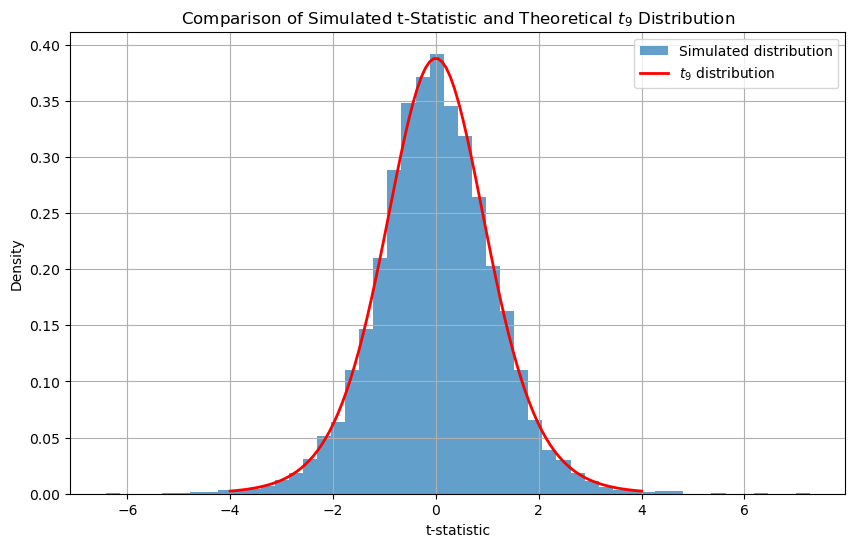

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 10          # 样本大小
mu = 5          # 总体均值
sigma = 2       # 总体标准差
num_samples = 10000  # 模拟次数

T_values = []

for _ in range(num_samples):
    sample = np.random.normal(mu, sigma, n)
    x_bar = np.mean(sample) # 样本均值
    s = np.std(sample, ddof=1) # 样本标准差
    t_stat = (x_bar - mu) / (s / np.sqrt(n))
    T_values.append(t_stat)

# 转换为数组
T_values = np.array(T_values)

# 绘制直方图并叠加 t 分布密度函数
plt.figure(figsize=(10, 6))
plt.hist(T_values, bins=50, density=True, alpha=0.7, label='Simulated distribution')

# 理论 t 分布（自由度 n-1）
x = np.linspace(-4, 4, 100)
t_pdf = stats.t.pdf(x, df=n-1)
plt.plot(x, t_pdf, 'r-', linewidth=2, label=f'$t_{{{n-1}}}$ distribution')

plt.title(f"Comparison of Simulated t-Statistic and Theoretical $t_{{{n-1}}}$ Distribution")
plt.xlabel("t-statistic")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## 模拟说明
这段代码从$\mu=5, \sigma=2$的**正态分布**中重复抽取样本量为 $n=10$ 的随机样本，共模拟 10,000 次。  
对每个样本计算 t 统计量：
$$
T = \frac{\bar{X} - \mu}{S / \sqrt{n}},
$$
其中 $\bar{X}$ 为样本均值，$S$ 为样本标准差。

根据得到的结果，我们绘制了概率分布直方图，并将其与自由度为 $n-1 = 9$ 的理论 $t$ 分布的概率密度函数进行了对比，发现高度吻合，因此待验证的结果成立。